In [12]:
#Q1

import torch
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import numpy as np

loss_list = []
torch.manual_seed(42)


In [13]:
X = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype = torch.float32)
Y = torch.tensor([0,1,1,0], dtype = torch.float32)

In [14]:
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.linear1 = nn.Linear(2,2,bias = True)
        self.activation1 = nn.Sigmoid()
        self.linear2 = nn.Linear(2,1,bias = True)
    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        return x

In [15]:
class MyDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx].to(device), self.Y[idx].to(device)

In [16]:
full_dataset = MyDataset(X,Y)
batch_size = 1
train_data_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle = True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = XORModel().to(device)
print(model)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.03)

XORModel(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (activation1): Sigmoid()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
)


In [17]:
def train_one_epoch(epoch_index):
    totalloss = 0.
    for i, data in enumerate(train_data_loader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs.flatten(), labels)
        loss.backward()
        optimizer.step()
        totalloss += loss.item()
    return totalloss/(len(train_data_loader)*batch_size)

In [18]:
EPOCHS = 10000
for epoch in range(EPOCHS):
    model.train(True)
    avg_loss = train_one_epoch(epoch)
    loss_list.append(avg_loss)
    if epoch%1000 == 0:
        print(f'EPOCH {epoch}/{EPOCHS}, Loss:{avg_loss}')

EPOCH 0/10000, Loss:0.301132844761014
EPOCH 1000/10000, Loss:0.27038102224469185
EPOCH 2000/10000, Loss:0.27022553235292435
EPOCH 3000/10000, Loss:0.26847536861896515
EPOCH 4000/10000, Loss:0.26516806334257126
EPOCH 5000/10000, Loss:0.22409657016396523
EPOCH 6000/10000, Loss:0.0001402673997290549
EPOCH 7000/10000, Loss:1.2700951401711791e-11
EPOCH 8000/10000, Loss:3.2152058793144533e-12
EPOCH 9000/10000, Loss:3.0020430585864233e-12


('linear1.weight', Parameter containing:
tensor([[-1.9767,  2.0750],
        [-3.0809,  3.3435]], device='cuda:0', requires_grad=True))
('linear1.bias', Parameter containing:
tensor([ 0.7012, -2.5002], device='cuda:0', requires_grad=True))
('linear2.weight', Parameter containing:
tensor([[-2.6653,  2.7713]], device='cuda:0', requires_grad=True))
('linear2.bias', Parameter containing:
tensor([1.5715], device='cuda:0', requires_grad=True))
The input is = tensor([0., 1.], device='cuda:0')
Output y predicted =tensor([1.0000], device='cuda:0', grad_fn=<ViewBackward0>)


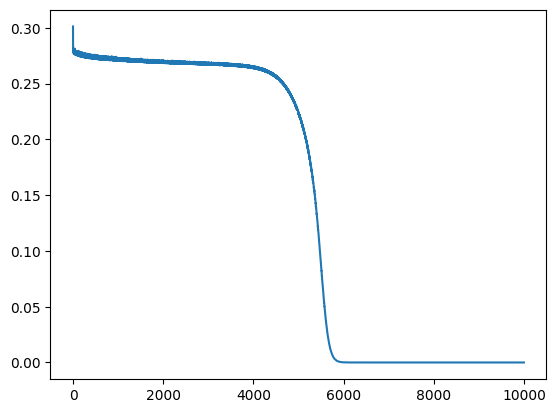

In [19]:
for param in model.named_parameters():
    print(param)
input = torch.tensor([0,1], dtype=torch.float32).to(device)
model.eval()
print("The input is = {}". format(input))
print("Output y predicted ={}".format(model(input)))
plt.plot(loss_list)
plt.show()

In [22]:
def sigmoid(x):
    return 1.0/(1+torch.exp(-x))

test = torch.tensor([0,0], dtype = torch.float32).to(device)
answer = 1
layer1 = torch.matmul(model.linear1.weight, test) + model.linear1.bias
layer1 = sigmoid(layer1)
layer2 = torch.matmul(model.linear2.weight, layer1) + model.linear2.bias
layer2 = sigmoid(layer2)
print(layer2)

tensor([0.5000], device='cuda:0', grad_fn=<MulBackward0>)


In [24]:
#Q2

class XORModel2(nn.Module):
    def __init__(self):
        super(XORModel2, self).__init__()
        self.linear1 = nn.Linear(2,2,bias = True)
        self.activation1 = nn.ReLU()
        self.linear2 = nn.Linear(2,1,bias = True)
    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        return x

In [25]:
class MyDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx].to(device), self.Y[idx].to(device)

In [26]:
full_dataset = MyDataset(X,Y)
batch_size = 1
train_data_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle = True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = XORModel2().to(device)
print(model)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.03)

XORModel2(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (activation1): ReLU()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
)


In [27]:
def train_one_epoch(epoch_index):
    totalloss = 0.
    for i, data in enumerate(train_data_loader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs.flatten(), labels)
        loss.backward()
        optimizer.step()
        totalloss += loss.item()
    return totalloss/(len(train_data_loader)*batch_size)

In [28]:
EPOCHS = 10000
loss_list = []
for epoch in range(EPOCHS):
    model.train(True)
    avg_loss = train_one_epoch(epoch)
    loss_list.append(avg_loss)
    if epoch%1000 == 0:
        print(f'EPOCH {epoch}/{EPOCHS}, Loss:{avg_loss}')

EPOCH 0/10000, Loss:0.2621123529970646
EPOCH 1000/10000, Loss:0.176821748886141
EPOCH 2000/10000, Loss:0.17666544514941052
EPOCH 3000/10000, Loss:0.17698334180022357
EPOCH 4000/10000, Loss:0.17709417054811638
EPOCH 5000/10000, Loss:0.1767520720104585
EPOCH 6000/10000, Loss:0.1767506182445686
EPOCH 7000/10000, Loss:0.1767607942425684
EPOCH 8000/10000, Loss:0.17676010169907386
EPOCH 9000/10000, Loss:0.1763134951761458


('linear1.weight', Parameter containing:
tensor([[ 0.7730, -0.7429],
        [ 0.5419, -0.6838]], device='cuda:0', requires_grad=True))
('linear1.bias', Parameter containing:
tensor([-0.0612, -0.0089], device='cuda:0', requires_grad=True))
('linear2.weight', Parameter containing:
tensor([[0.6482, 0.3910]], device='cuda:0', requires_grad=True))
('linear2.bias', Parameter containing:
tensor([0.3332], device='cuda:0', requires_grad=True))
The input is = tensor([0., 1.], device='cuda:0')
Output y predicted =tensor([0.3332], device='cuda:0', grad_fn=<ViewBackward0>)


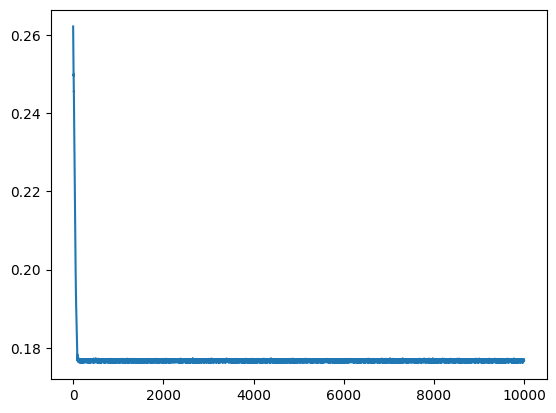

In [29]:
for param in model.named_parameters():
    print(param)
input = torch.tensor([0,1], dtype=torch.float32).to(device)
model.eval()
print("The input is = {}". format(input))
print("Output y predicted ={}".format(model(input)))
plt.plot(loss_list)
plt.show()

In [30]:
#Q3

def relu(x):
    return torch.max(torch.tensor(0), x)

test = torch.tensor([0,0], dtype = torch.float32).to(device)
answer = 1
layer1 = torch.matmul(test,model.linear1.weight.T) + model.linear1.bias
layer1 = relu(layer1)
layer2 = torch.matmul(layer1, model.linear2.weight.T) + model.linear2.bias
layer2 = relu(layer2)
print(layer2)

tensor([0.3332], device='cuda:0', grad_fn=<MaximumBackward0>)


In [31]:
#Q4

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [32]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001


In [33]:
# Import MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████| 9912422/9912422 [00:20<00:00, 485921.37it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████| 28881/28881 [00:00<00:00, 125123.89it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████| 1648877/1648877 [00:09<00:00, 177209.36it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 1752739.79it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [34]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [35]:
examples = iter(test_loader)
example_data, example_targets = examples.next()

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()


AttributeError: '_SingleProcessDataLoaderIter' object has no attribute 'next'

In [36]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [37]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [38]:
# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/2], Step [100/600], Loss: 0.4505
Epoch [1/2], Step [200/600], Loss: 0.2682
Epoch [1/2], Step [300/600], Loss: 0.2066
Epoch [1/2], Step [400/600], Loss: 0.1716
Epoch [1/2], Step [500/600], Loss: 0.1623
Epoch [1/2], Step [600/600], Loss: 0.1726
Epoch [2/2], Step [100/600], Loss: 0.0859
Epoch [2/2], Step [200/600], Loss: 0.1518
Epoch [2/2], Step [300/600], Loss: 0.0791
Epoch [2/2], Step [400/600], Loss: 0.0546
Epoch [2/2], Step [500/600], Loss: 0.0842
Epoch [2/2], Step [600/600], Loss: 0.1073


In [39]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 96.94 %
